<a href="https://colab.research.google.com/github/MohanRajcom7/MINIPROJECTINFO/blob/main/DATA%20ANALYTICS(WEB%20SCRAPING%20ON%20BOOKING.COM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import requests

In [2]:
# Base URL without the offset parameter
base_url = 'https://www.booking.com/searchresults.en-gb.html?ss=Salem+hotels&ssne=New+Delhi&ssne_untouched=New+Delhi&efdco=1&label=gen173nr-1FCAEoggI46AdIM1gEaGyIAQGYAQm4ARfIAQzYAQHoAQH4AQOIAgGoAgO4At-xprMGwAIB0gIkZDRlNGZjMTktZjY0OS00N2Q3LTkwMTItOTZhMDY2ODU3NGRl2AIG4AIB&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2109974&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en-gb&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=27c05d731ea203bd&ac_meta=EgsSCWh0X2lkfjIwNCAFKAU%3D&nflt=ht_id%3D204&checkin=2024-11-26&checkout=2024-11-27&group_adults=2&no_rooms=1&group_children=0&flex_window=1'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

In [3]:
hotel_results = []

# Loop through pages 1 to 40
for page_number in range(0, 250,25):
    url = base_url.format(page_number)

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    for el in soup.find_all("div", {"data-testid": "property-card"}):
        # Extract rating, handling cases where it's not present
        rating_element = el.find("div", {"data-testid": "review-score"})
        rating = rating_element.text.strip().split(" ")[0] if rating_element else "N/A"  # Handle missing ratings

        hotel_results.append({
            "name": el.find("div", {"data-testid": "title"}).text.strip(),
            'description': el.find('div', {'data-testid': 'recommended-units', 'class': 'ccdd44706b'}).text.strip(),
            "location": el.find("span", {"data-testid": "address"}).text.strip(),
            "pricing": el.find("span", {"data-testid": "price-and-discounted-price"}).text.strip(),
            "rating": rating  # Use the extracted or default rating
        })

# Create DataFrame from the collected results
hotels = pd.DataFrame(hotel_results)

In [5]:
hotels.head(15)

,name,description,location,pricing,rating
0,Hotel Elpaso,Superior King SuitePrivate suite1 queen bedBre...,Salem,$45,Scored
1,Radisson Salem,Superior Room1 full bedFree cancellationNo pre...,Salem,$112,Scored
2,YMCA PROGRAM CENTRE,Deluxe Room1 queen bedBreakfast includedOnly 3...,Salem,$20,Scored
3,"CJ Pallazzio,Salem",Superior Twin Room2 twin bedsOnly 4 rooms left...,Salem,$62,Scored
4,Sri K residency,Twin Room with City View2 twin bedsFree cancel...,Salem,$22,Scored
5,Hotel Cenneys Gateway,Deluxe Double Room1 king bed,Salem,$65,Scored
6,Super OYO Hotel O Maruthi,Classic Triple Room1 queen bedFree cancellatio...,Salem,$6,Scored
7,Rathna Residency,Standard Double Room2 twin bedsBreakfast inclu...,Salem,$40,Scored
8,CM Residency,Double Room1 full bedOnly 1 room left at this ...,Salem,$19,Scored
9,The Palm Residency- Ariyanoor,2×Economy Double Room4 twin bedsFree cancellation,Salem,$51,Scored


In [6]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         250 non-null    object
 1   description  250 non-null    object
 2   location     250 non-null    object
 3   pricing      250 non-null    object
 4   rating       250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [20]:
"""hotels['pricing'] = hotels['pricing'].str.replace('[€,US\xa0]', '', regex=True).astype(float)
hotels['rating'] = hotels['rating'].str.extract('(\d+\.\d+)')
# Convert the 'rating' column to numeric
hotels['rating'] = pd.to_numeric(hotels['rating'], errors='coerce')"""
# Clean and convert 'pricing'
hotels['pricing'] = hotels['pricing'].astype(str).str.replace('[€,US\xa0]', '', regex=True)
hotels['pricing'] = pd.to_numeric(hotels['pricing'], errors='coerce')  # Convert to float safely

# Clean and extract 'rating'
hotels['rating'] = hotels['rating'].astype(str).str.extract('(\d+\.\d+)')  # Extract ratings as strings
hotels['rating'] = pd.to_numeric(hotels['rating'], errors='coerce')  # Convert to numeric safely


In [21]:

# Drop rows with missing values in the 'rating' column
hotels.dropna(subset=['rating'],inplace=True)

In [22]:
# Descriptive statistics
print(hotels.describe())

# Unique values and value counts
print(hotels['location'].value_counts())

       pricing  rating
count      0.0     0.0
mean       NaN     NaN
std        NaN     NaN
min        NaN     NaN
25%        NaN     NaN
50%        NaN     NaN
75%        NaN     NaN
max        NaN     NaN
Series([], Name: count, dtype: int64)


In [23]:
# Correlation matrix
correlation_matrix = hotels.corr()
print(correlation_matrix)

             name  description  location  pricing  rating
name          NaN          NaN       NaN      NaN     NaN
description   NaN          NaN       NaN      NaN     NaN
location      NaN          NaN       NaN      NaN     NaN
pricing       NaN          NaN       NaN      NaN     NaN
rating        NaN          NaN       NaN      NaN     NaN


In [41]:
data = {'pricing': ['100€', '200 US', '300', 'invalid', '400€']}
hotels = pd.DataFrame(data)

# Clean 'pricing'
hotels['pricing'] = hotels['pricing'].astype(str).str.replace('[€,US\xa0]', '', regex=True)
hotels['pricing'] = pd.to_numeric(hotels['pricing'], errors='coerce')  # Convert to float safely
hotels = hotels.dropna(subset=['pricing'])


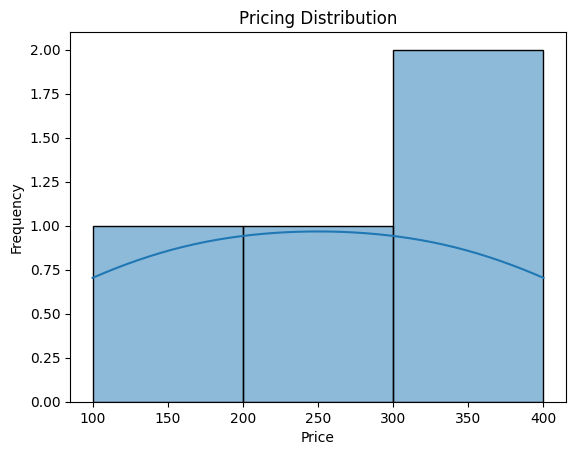

In [42]:
# Distribution plot for pricing
"""sns.histplot(hotels['pricing'], kde=True)
plt.show()"""
sns.histplot(hotels['pricing'], kde=True)
plt.title("Pricing Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

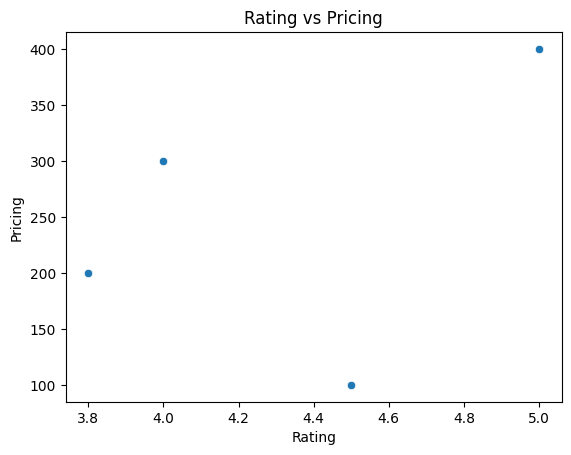

In [50]:
sns.scatterplot(data=hotels, x='rating', y='pricing')
plt.title("Rating vs Pricing")
plt.xlabel("Rating")
plt.ylabel("Pricing")
plt.show()


Index(['rating', 'pricing'], dtype='object')
   rating  pricing
0     4.5    100.0
1     3.8    200.0
2     4.0    300.0
4     5.0    400.0


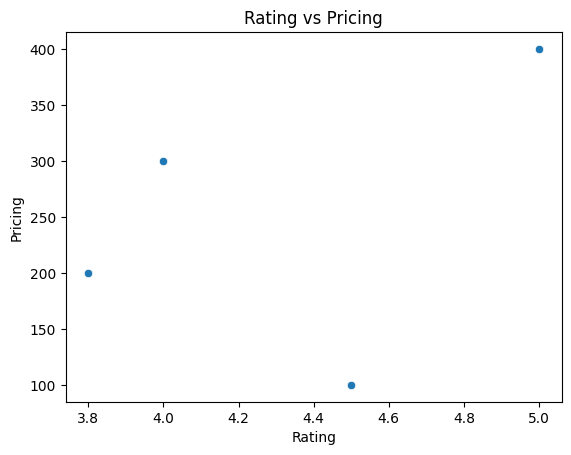

In [51]:
# Clean Data
hotels['rating'] = pd.to_numeric(hotels['rating'], errors='coerce')
hotels['pricing'] = pd.to_numeric(hotels['pricing'], errors='coerce')
hotels = hotels.dropna(subset=['rating', 'pricing'])  # Remove rows with NaN

# Debugging: Ensure columns exist and have valid data
print(hotels.columns)  # Check column names
print(hotels[['rating', 'pricing']].head())  # Check values

# Scatter Plot
sns.scatterplot(data=hotels, x='rating', y='pricing')
plt.title("Rating vs Pricing")
plt.xlabel("Rating")
plt.ylabel("Pricing")
plt.show()


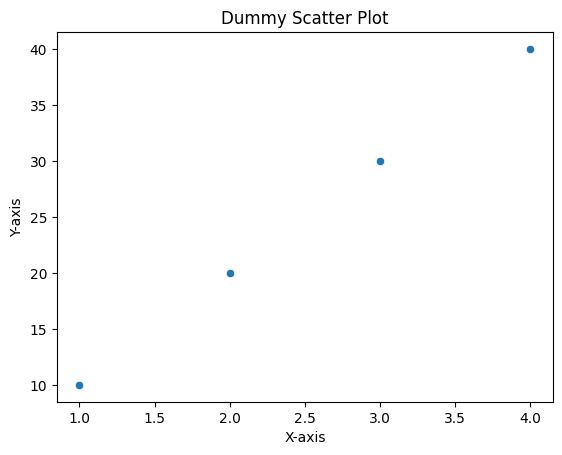

In [52]:
sns.scatterplot(x=[1, 2, 3, 4], y=[10, 20, 30, 40])
plt.title("Dummy Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


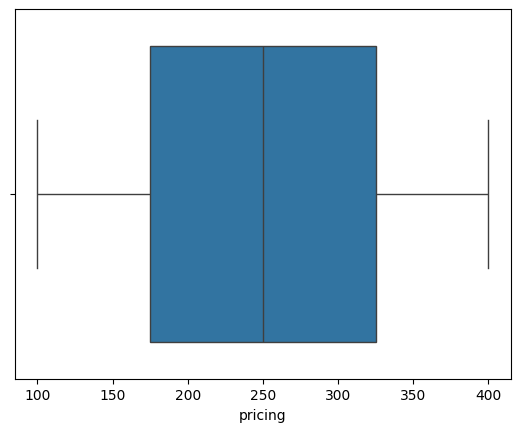

In [53]:
# Box plot for 'pricing'
sns.boxplot(x=hotels['pricing'])
plt.show()

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hotels[['rating']], hotels['pricing'], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 11.111111111110985
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [55]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

count_outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)].shape[0]

print(f'Number of outliers in pricing: {count_outliers}')

Number of outliers in pricing: 0


In [56]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

In [57]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)]
# Remove outliers
hotels_no_outliers = hotels[(hotels['pricing'] >= lower_bound) & (hotels['pricing'] <= upper_bound)]

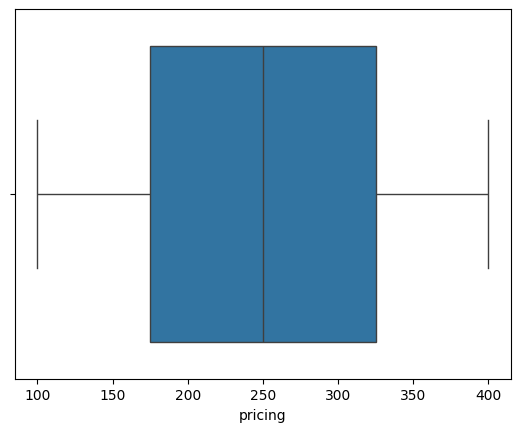

In [58]:
# Box plot for 'pricing'
sns.boxplot(x=hotels_no_outliers['pricing'])
plt.show()

In [59]:
# Prepare the data
X = hotels_no_outliers[['rating']]
y = hotels_no_outliers['pricing']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'R-squared': r_squared}

# Print the results
for model_name, scores in results.items():
    print(f"{model_name} - MSE: {scores['MSE']}, R-squared: {scores['R-squared']}")

# Choose the best model based on MSE or R-squared (based on preference)
best_model = min(results, key=lambda k: results[k]['MSE'])
print(f"\nBest Model based on MSE: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Linear Regression - MSE: 11.111111111110985, R-squared: nan
Decision Tree Regressor - MSE: 10000.0, R-squared: nan
Random Forest Regressor - MSE: 2209.0, R-squared: nan
Gradient Boosting Regressor - MSE: 9999.82292479131, R-squared: nan

Best Model based on MSE: Linear Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
